In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv("C:/Users/Jatin/Downloads/Major Project/Dataset/Sentiment Analysis/HotelReview1to5.csv", encoding = "ISO-8859-1")
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


In [5]:
df["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [6]:
df.shape

(20491, 3)

## Preprocessing of text

Text Preprocessing is a process of converting and cleaning of the dataset so that it can be easily fed into the machine learning algorithm for its proper functioning and giving higher accuracy.

## Lower casing

In [8]:
df['Review'] = df['Review'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique great stay wonderful time hotel monaco ...,5
4,5,great stay great stay went seahawk game awesom...,5


## Remove punctuations

In [11]:
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4 experience hotel monaco seatt...,3
3,4,unique great stay wonderful time hotel monaco ...,5
4,5,great stay great stay went seahawk game awesom...,5


## Removal of Stopwords

In [13]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(y for y in x.split() if y not in stop))
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms 4 experience hotel monaco seattle g...,3
3,4,unique great stay wonderful time hotel monaco ...,5
4,5,great stay great stay went seahawk game awesom...,5


## Using SentiWordNet

In [14]:
lemmatizer = WordNetLemmatizer()
 
 
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 
 
def clean_text(text):
    text = text.replace("<br />", " ")
    text = text.decode("utf-8")
 
    return text
 
 
def swn_polarity(text):
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
 
    sentiment = 0.0
    tokens_count = 0
 
    #text = clean_text(text)
 
 
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
 
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
 
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 3
    
    else:
        return (sentiment/tokens_count)
    '''
    elif sentiment >= 0.08:
        return 5
    elif sentiment <= -0.06:
        return 1
    elif sentiment >= 0.04 and sentiment < 0.08:
        return 4
    elif sentiment <=0.02 and sentiment > -0.06:
        return 2
    else:
        return 3
    
    '''
    ## sum greater than 0 => positive sentiment
    #if sentiment >= 0:
    #    return 1
 
    ## negative sentiment
    #return 0

In [16]:
df["predicted_sent"] = df["Review"].apply(swn_polarity)
df

,S.No.,Review,Rating,predicted_sent
0,1,nice hotel expensive parking got good deal sta...,4,0.063636
1,2,ok nothing special charge diamond member hilto...,2,0.046099
2,3,nice rooms 4 experience hotel monaco seattle g...,3,0.027218
3,4,unique great stay wonderful time hotel monaco ...,5,0.083333
4,5,great stay great stay went seahawk game awesom...,5,0.041667
5,6,love monaco staff husband stayed hotel crazy w...,5,0.040123
6,7,cozy stay rainy city husband spent 7 nights mo...,5,0.001812
7,8,excellent staff housekeeping quality hotel cho...,4,0.068182
8,9,hotel stayed hotel monaco cruise rooms generou...,5,0.055556
9,10,excellent stayed hotel monaco past delight rec...,5,0.019231


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

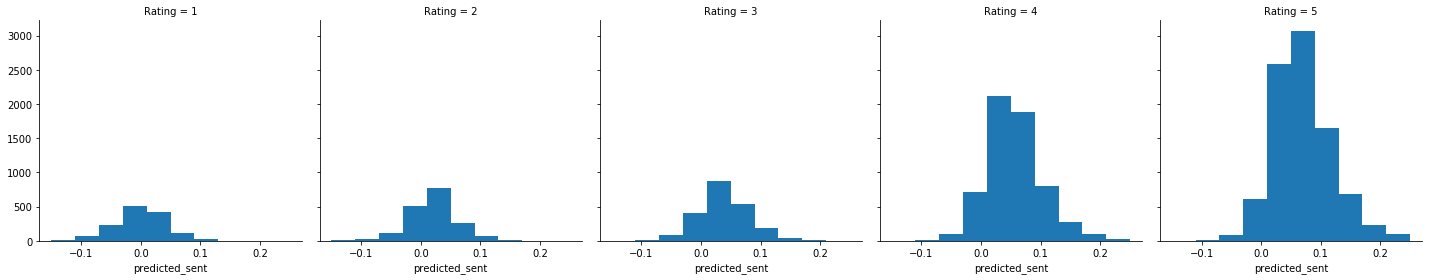

In [19]:
g = sns.FacetGrid(df, col = "Rating", size = 4)
g.map(plt.hist, "predicted_sent", range=(-0.15, 0.25))